## *Import Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
!unzip /content/drive/MyDrive/data_preprocessing.zip

Archive:  /content/drive/MyDrive/data_preprocessing.zip
  inflating: data_preprocessing.csv  


In [4]:
df = pd.read_csv("/content/data_preprocessing.csv")

In [5]:
def load_inputs_outputs():

  X = df.drop(["price"],axis = "columns")
  y = df.price

  return X,y

## *Load Inputs and Targets*

In [6]:
X,y = load_inputs_outputs()  

## *Split Data*

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

## *Numpy Transform*

In [9]:
X_train,Y_train = np.asarray(X_train),np.asarray(Y_train)

In [10]:
X_test,Y_test = np.asarray(X_test),np.asarray(Y_test)

The Numpy library allows the transformation of variables to arrays. This allows the training algorithm to train faster.

In [11]:
n_estimators1,n_estimators2,n_estimators3 = np.arange(500,1000,5),np.arange(200,700,5),np.arange(100,500,5)

# *XGBoost*

In [12]:
from xgboost import XGBRegressor

## Number Estimators Ideal

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
class Estimators():

  def __init__(self,max_depth):

    self.max_depth = max_depth

  def EstimatorsFit(self,n_estimators):


    mse_train_list,mse_test_list = list(),list()

    for n_estimator in n_estimators:

      model = XGBRegressor(max_depth = self.max_depth,
                   learning_rate=0.01,
                   n_estimators=n_estimator,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')
    
      model.fit(X_train,Y_train)

      pred_train,pred_test = model.predict(X_train),model.predict(X_test)
      mse_train,mse_test = mean_squared_error(Y_train,pred_train),mean_squared_error(Y_test,pred_test)


      mse_train_list.append(mse_train)
      mse_test_list.append(mse_test)

    return mse_train_list,mse_test_list



  def History(n_estimators,mse_train_list,mse_test_list):

    fig,ax = plt.subplots(1,1,figsize = (20,8))
    ax.set_title("Number of Estimators")
    ax.plot(n_estimators,mse_train_list,label = "MSE Train")
    ax.plot(n_estimators,mse_test_list,label = "MSE Test")
    ax.legend()

## *First Model*

Because it is the first number and of the 3 it will have the least amount of depth. Therefore, I will opt to evaluate up to a maximum number of 1000 estimators.

In [15]:
sns.set_style("whitegrid")

In [16]:
evaluate_estimators = Estimators(max_depth = 6)

In [17]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit(n_estimators=n_estimators1)

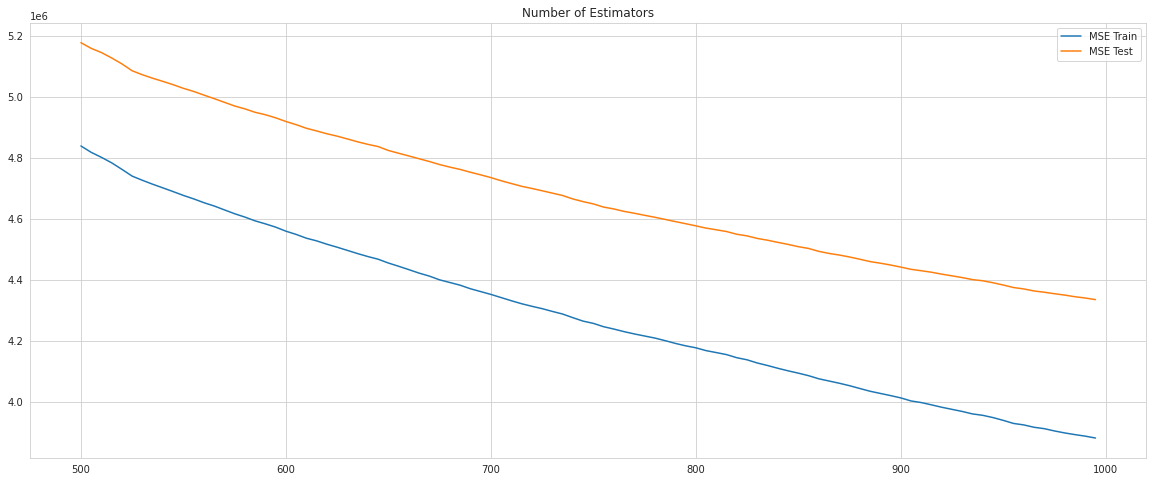

In [18]:
_ = Estimators.History(n_estimators1,mse_train_list,mse_test_list)

In [19]:
xgb = XGBRegressor(max_depth = 6,
                   learning_rate=0.01,
                   n_estimators=1000,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [20]:
xgb.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=6, n_estimators=1000,
             random_state=42, silent=True, subsample=0.8,
             tree_method='gpu_hist', verbose=0)

In [21]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb.predict(X_test))))

MSE train: 3876760.123008649
MSE test: 4331461.0981656285


## *Second Model*

The range of estimators that we use with a maximum depth of 7 we will use 200 estimators as a minimum and 700 as a maximum.

In [22]:
evaluate_estimators = Estimators(max_depth = 7)

In [23]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit(n_estimators=n_estimators2)

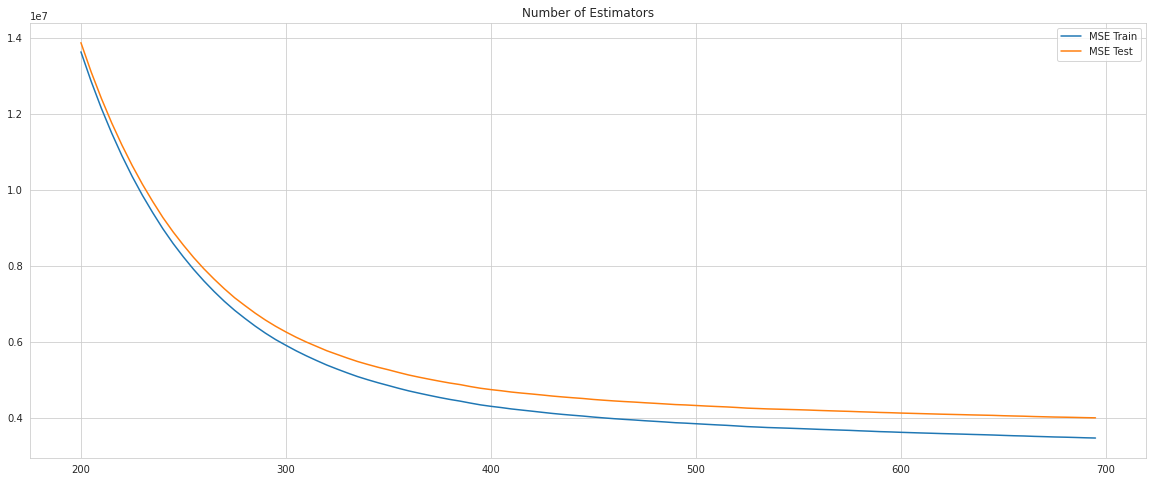

In [24]:
_ = Estimators.History(n_estimators2,mse_train_list,mse_test_list)

In [25]:
xgb2 = XGBRegressor(max_depth = 7,
                   learning_rate=0.01,
                   n_estimators=700,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [26]:
xgb2.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=700, random_state=42,
             silent=True, subsample=0.8, tree_method='gpu_hist', verbose=0)

In [27]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb2.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb2.predict(X_test))))

MSE train: 3459703.219470956
MSE test: 3992299.9880249645


## *Third Model*

For the second model I will use a quantity of 500 estimators as the maximum quantity.

In [28]:
evaluate_estimators = Estimators(max_depth = 8)

In [29]:
mse_train_list,mse_test_list = evaluate_estimators.EstimatorsFit(n_estimators = n_estimators3)

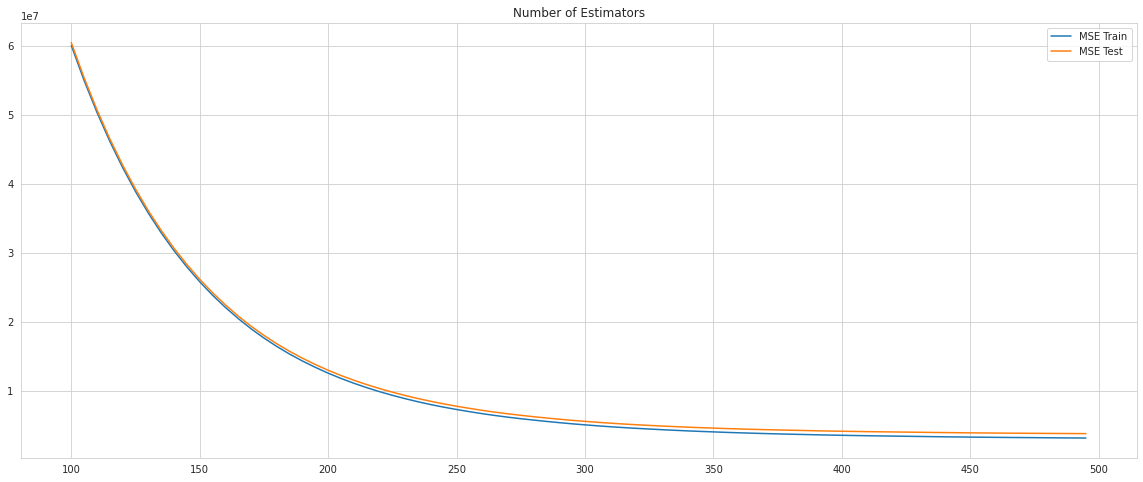

In [30]:
_ = Estimators.History(n_estimators3,mse_train_list,mse_test_list)

In [31]:
xgb3 = XGBRegressor(max_depth = 8,
                   learning_rate=0.01,
                   n_estimators=500,
                   subsample=0.8,
                   silent=True,
                   random_state = 42,
                   verbose = 0,
                   tree_method='gpu_hist')

In [32]:
xgb3.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=500, random_state=42,
             silent=True, subsample=0.8, tree_method='gpu_hist', verbose=0)

In [33]:
print("MSE train: {}".format(mean_squared_error(Y_train,xgb3.predict(X_train))))
print("MSE test: {}".format(mean_squared_error(Y_test,xgb3.predict(X_test))))

MSE train: 3153053.222325377
MSE test: 3793624.3389433366


Observations

The last 2 models offer very good results, so I will take their base models to find the best combination of possible parameters. For each model, it reaches its best performance with the maximum number of estimators that we assign to each model.

## *GridSearchCV*

We use GridSearchCV to find the best possible combination of parameters. the best combination of parameters.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params1 = dict(max_depth = [7],
                   learning_rate=[0.01],
                   n_estimators=[660,680,700],
                   subsample=[0.8,0.85,0.9],
                   silent=[True],
                   random_state = [42],
                   verbose = [0],
                   tree_method=['gpu_hist'])


params2 =  dict(max_depth = [8],
                   learning_rate=[0.01],
                   n_estimators=[460,480,500],
                   subsample=[0.8,0.85,0.9],
                   silent=[True],
                   random_state = [42],
                   verbose = [0],
                   tree_method=['gpu_hist'])

### *GridSearchCV 1*

In [40]:
grid_search1 = GridSearchCV(XGBRegressor(),params1,cv = 5)

In [41]:
grid_search1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.01], 'max_depth': [7],
                         'n_estimators': [660, 680, 700], 'random_state': [42],
                         'silent': [True], 'subsample': [0.8, 0.85, 0.9],
                         'tree_method': ['gpu_hist'], 'verbose': [0]})

In [42]:
grid_search1.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 700,
 'random_state': 42,
 'silent': True,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'verbose': 0}

### *GridSearchCV 2*

In [43]:
grid_search2 = GridSearchCV(XGBRegressor(),params2,cv = 5)

In [44]:
grid_search2.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.01], 'max_depth': [8],
                         'n_estimators': [460, 480, 500], 'random_state': [42],
                         'silent': [True], 'subsample': [0.8, 0.85, 0.9],
                         'tree_method': ['gpu_hist'], 'verbose': [0]})

In [45]:
grid_search2.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500,
 'random_state': 42,
 'silent': True,
 'subsample': 0.85,
 'tree_method': 'gpu_hist',
 'verbose': 0}

## *Model Selection*

In [46]:
models = {"Model 1":XGBRegressor(**grid_search1.best_params_),
          "Model 2":XGBRegressor(**grid_search2.best_params_)}

In [47]:
def train_model(model):

  return model.fit(X_train,Y_train)

In [48]:
for model in models.values():

  train_model(model)

In [49]:
for name,model in models.items():

  print(f"{name}: MSE Train {mean_squared_error(Y_train,model.predict(X_train))}")
  print(f"{name}: MSE Test {mean_squared_error(Y_test,model.predict(X_test))}")
  print("=====================================================================")

Model 1: MSE Train 3459703.219470956
Model 1: MSE Test 3992299.9880249645
Model 2: MSE Train 3122950.9341968386
Model 2: MSE Test 3791434.4570940575


The second model has better metrics than the previous one. Therefore, the second model is the winner to solve the problem.

## *Winning Model*

In [54]:
params = {'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500,
 'random_state': 42,
 'silent': True,
 'subsample': 0.85,
 'n_jobs': -1,
 'verbose': 0}

In [55]:
xgb = XGBRegressor(**params)

We pass the same parameters of the select model.

In [56]:
xgb.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=500, n_jobs=-1,
             random_state=42, silent=True, subsample=0.85, verbose=0)

In [57]:
xgb.score(X_train,Y_train)

0.9655730714870895

In [58]:
xgb.score(X_test,Y_test)

0.9592566611307437

## *Metrics*

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [69]:
class Metrics():

  def __init__(self,pred_train,pred_test):
    self.pred_train = pred_train
    self.pred_test = pred_test


  def MSE(self):

    mse_train = mean_squared_error(Y_train,self.pred_train)
    mse_test = mean_squared_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def MAE(self):

    mse_train = mean_absolute_error(Y_train,self.pred_train)
    mse_test = mean_absolute_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def CrossValidation(self,model,x,y):

    return cross_val_score(model,x,y,cv = 5,n_jobs = -1)
                           

In [59]:
pred_train,pred_test = xgb.predict(X_train),xgb.predict(X_test)

In [70]:
metrics = Metrics(pred_train,pred_test)

In [62]:
mse_train,mse_test = metrics.MSE()

In [63]:
mae_train,mae_test = metrics.MAE()

## *Mean Square Error*

In [64]:
print(f"MSE Train {mse_train}")
print(f"MSE Test {mse_test}")

MSE Train 3108813.3868147447
MSE Test 3734786.378706163


## *Mean Absolute Error*

In [65]:
print(f"MAE Train {mae_train}")
print(f"MAE Test {mae_test}")

MAE Train 1231.5326408803355
MAE Test 1304.3153884805427


## *Cross Validation*

In [71]:
cv = metrics.CrossValidation(xgb,X_test,Y_test)

In [72]:
cv

array([0.9262154 , 0.94889465, 0.94849989, 0.9469818 , 0.94337736])

In [73]:
cv.mean()

0.9427938185780264

It has a high percentage of generalization. Therefore, on average, it is able to explain 94% of the data.

## *Save Model*

In [75]:
xgb.save_model("xgb_car_price.json")

We save the model in JSON format. Since it allows a faster execution of the model. When we create the web application, something that is beneficial. In addition, we would save the installation of libraries in the file requirements.txt

## *Save Column Names*

In [78]:
import json

In [76]:
columns = {"columns_data": [col for col in X.columns]}

In [79]:
with open("columns.json","w") as F:
  F.write(json.dumps(columns))

We save the name of the input variables in JSON format. In order to facilitate the preprocessing of new data.